<a href="https://colab.research.google.com/github/ajaykgautam/PNamePid/blob/main/facebook_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt



In [16]:
# Task 1: Graph Representation
def load_graph_from_file(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():
                node1, node2 = line.strip().split()
                G.add_edge(node1, node2)
    return G



In [17]:
# Task 2: Feature Engineering
def calculate_node_features(G):
    # Example: Calculate degree centrality and clustering coefficient as features
    degree_centrality = dict(nx.degree_centrality(G))
    clustering_coefficient = dict(nx.clustering(G))
    node_features = pd.DataFrame({'degree_centrality': degree_centrality, 'clustering_coefficient': clustering_coefficient})
    return node_features.fillna(0)



In [18]:
# Task 3: Data Preparation
def prepare_data_for_clustering(node_features):
    # Scale features for clustering
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(node_features)
    return scaled_features


In [19]:
# Task 4: Exploratory Data Analysis
def explore_data_analysis(G):

# 1. Summary Statistics
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph)

    print("Summary Statistics:")
    print(f"Number of Nodes: {num_nodes}")
    print(f"Number of Edges: {num_edges}")
    print(f"Density: {density}")

# 2. Degree Distribution
    degrees = [degree for node, degree in graph.degree()]
    degree_counts = pd.Series(degrees).value_counts().sort_index()
    plt.bar(degree_counts.index, degree_counts.values, color='skyblue')
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

# 3. Visualization of the Graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_size=10, node_color='skyblue', edge_color='gray', alpha=0.6)
    plt.title('Graph Visualization')
    plt.show()

In [20]:
# Task 5: Clustering
def apply_clustering(features, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    return cluster_labels



In [21]:
# Task 6:
def evaluation_explore(G):
    # Convert the graph to a DataFrame
    df = pd.DataFrame(G.edges(), columns=['node1', 'node2'])

    # Feature Engineering
    node_degrees = dict(G.degree())
    nx.set_node_attributes(G, node_degrees, name='degree')

    # Calculate betweenness centrality for each node and add it as a feature
    betweenness_centrality = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_centrality, name='betweenness_centrality')


In [22]:
# Task 7: Interpretation and Analysis
def visualize_clusters(G, cluster_labels):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_size=100)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    # Create a ScalarMappable object
    cmap = plt.cm.Set1
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    plt.colorbar(sm, label='Cluster')
    plt.title('Graph Clustering')
    plt.show()



Drive already mounted at /content/mydata; to attempt to forcibly remount, call drive.mount("/content/mydata", force_remount=True).
Summary Statistics:
Number of Nodes: 4039
Number of Edges: 88234
Density: 0.010819963503439287


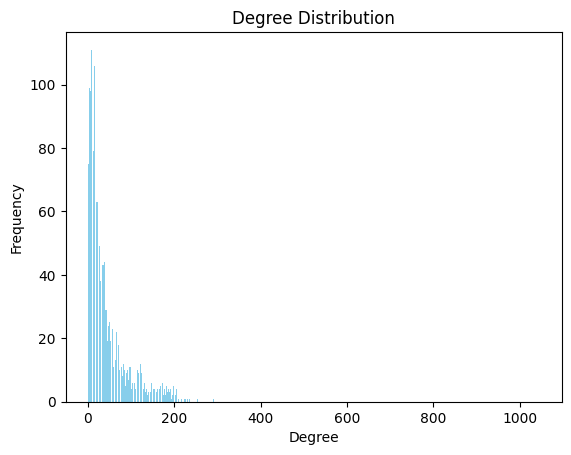

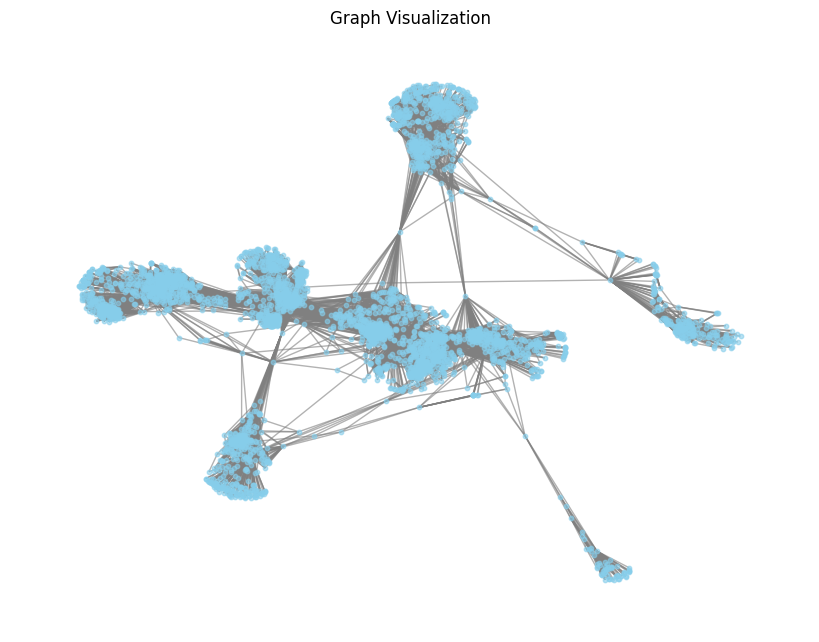

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Evaluation Metrics:
Silhouette Score: 0.4492296351031984
Calinski-Harabasz Index: 3132.5843360313415
Davies-Bouldin Index: 0.7555709527678914
Shape of cluster_labels: (4039,)
Content of cluster_labels:
[1 0 2 ... 2 2 0]
Unique labels: [0 1 2]


<ipython-input-22-31d5bb3d3920>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Cluster')


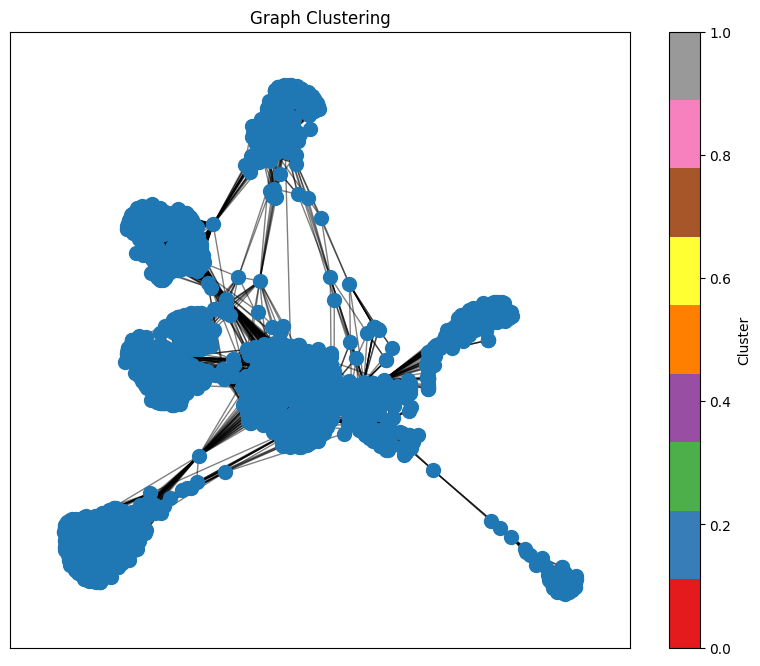

Shape of the dataframe: (4000, 20)

First few rows of the dataframe:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.689010   0.304244   0.014393   0.572310   0.664088   0.803669   
1   0.780262   0.983607   0.019618   0.240702   0.676664   0.829845   
2   0.907020   0.648208   0.191492   0.144412   0.300900   0.827570   
3   0.818132   0.351332   0.280618   0.758930   0.230354   0.700222   
4   0.515802   0.230706   0.286853   0.215613   0.969015   0.688005   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   0.113933   0.991028   0.391022   0.867644    0.030830    0.357113   
1   0.678216   0.317655   0.705950   0.765566    0.396127    0.127808   
2   0.766503   0.969483   0.634002   0.902369    0.284351    0.755827   
3   0.108520   0.243082   0.987373   0.283900    0.829947    0.289633   
4   0.606053   0.147446   0.286893   0.722497    0.012670    0.384693   

   feature_12  feature_13  feature_14  feature_15  feature_16  fe

In [24]:
# Example usage:
if __name__ == "__main__":
    # Task 1: Load graph from file
    import os
    from google.colab import drive
    drive.mount('/content/mydata')
    file_path = '/content/mydata/MyDrive/facebook_combined/facebook_combined.txt'
    graph = load_graph_from_file(file_path)

    # Task 2: Calculate node features
    node_features = calculate_node_features(graph)

    # Task 3: Prepare data for clustering
    features = prepare_data_for_clustering(node_features)

    # Task 4: Exploratory Data Analysis
    explore_data_analysis(graph)

    # Task 5: Clustering
    num_clusters = 3
    cluster_labels = apply_clustering(features, num_clusters)

    # Task 6: Evaluation
    evaluation_explore(graph)

    silhouette = silhouette_score(features, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(features, cluster_labels)
    davies_bouldin = davies_bouldin_score(features, cluster_labels)

    # Print evaluation results
    print("Evaluation Metrics:")
    print(f"Silhouette Score: {silhouette}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")

    # for debugging purpose
    print("Shape of cluster_labels:", cluster_labels.shape)
    print("Content of cluster_labels:")
    print(cluster_labels)

    # Print unique values
    unique_labels = np.unique(cluster_labels)
    print("Unique labels:", unique_labels)

    # Task 7: Interpretation and Analysis
    visualize_clusters(graph, cluster_labels)

    #at the end
    # Simulating node features
    num_nodes = 4000
    num_features = 20

    # Generate random features for each node
    node_features = np.random.rand(num_nodes, num_features)

    # Create a dataframe from the node features
    feature_names = [f'feature_{i}' for i in range(num_features)]
    node_features_df = pd.DataFrame(node_features, columns=feature_names)

    # Display the shape of the dataframe
    print("Shape of the dataframe:", node_features_df.shape)

    # Display the dataframe
    print("\nFirst few rows of the dataframe:")
    print(node_features_df.head())
